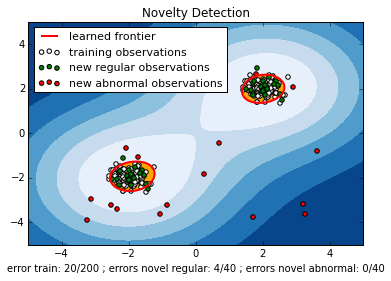

In [87]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)

Z1 = clf.predict(X_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

In [96]:
y_pred_train.shape

(200,)

In [66]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
s.fit(X)
X1 = s.transform(X)

In [58]:
import pandas as pd
X = pd.read_csv("digits.csv")
X.values

array([[  1,  10],
       [  2,  20],
       [  3,  30],
       [  4,  40],
       [  5,  50],
       [  6,  60],
       [  7,  70],
       [  8,  80],
       [  9,  90],
       [ 10, 100],
       [ 11, 110]])

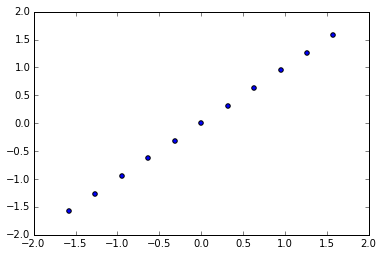

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

r = plt.scatter(X1[:,0],X1[:,1])

In [89]:
from sklearn.svm import OneClassSVM

clf = OneClassSVM()
clf.fit(X1)

clf.predict(X1)

array([-1., -1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.])

In [90]:
clf.decision_function(X1)

array([[ -2.15080232e-01],
       [ -1.40090414e-04],
       [  4.02955964e-02],
       [  1.43239575e-02],
       [ -1.40077563e-04],
       [ -2.10654299e-04],
       [ -1.34471501e-04],
       [  1.45031829e-02],
       [  4.07918788e-02],
       [  6.25257820e-04],
       [ -2.14257287e-01]])

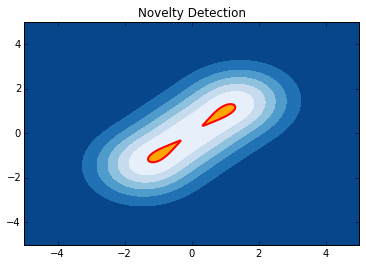

In [188]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")

plt.contourf(
    xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)

a = plt.contour(
    xx, yy, Z, levels=[0], linewidths=2, colors='red')

z = plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')